In [1]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
from sklearn.linear_model import LinearRegression

In [2]:
train = pd.read_csv("train.csv")
test = pd.read_csv("test.csv")
sample = pd.read_csv("sample_submit.csv",header=None)

In [3]:
# 基本統計量の確認
train.describe()

,id,y,year
count,1721.000000,1721.000000,1721.000000
mean,15045.691458,10662.395119,2012.815224
std,648.205749,8106.877159,0.757613
min,13994.000000,0.000000,2012.000000
25%,14474.000000,4750.000000,2012.000000
50%,15044.000000,8650.000000,2013.000000
75%,15528.000000,13431.000000,2013.000000
max,16237.000000,54905.000000,2014.000000


In [4]:
# trainデータのy(観客数)の値の平均を求める
train["y"].mean()

10662.395119116793

In [5]:
# y（観客数）が10000以上を求める
train[train["y"]>=10000]

,id,y,year,stage,match,gameday,time,home,away,stadium,tv
0,13994,18250,2012,Ｊ１,第１節第１日,03/10(土),14:04,ベガルタ仙台,鹿島アントラーズ,ユアテックスタジアム仙台,スカパー／ｅ２／スカパー光／ＮＨＫ総合
1,13995,24316,2012,Ｊ１,第１節第１日,03/10(土),14:04,名古屋グランパス,清水エスパルス,豊田スタジアム,スカパー／ｅ２／スカパー光（Ｊ ＳＰＯＲＴＳ ４）／ＮＨＫ名古屋
2,13996,17066,2012,Ｊ１,第１節第１日,03/10(土),14:04,ガンバ大阪,ヴィッセル神戸,万博記念競技場,スカパー／ｅ２／スカパー光（Ｊ ＳＰＯＲＴＳ １）／ＮＨＫ大阪
3,13997,29603,2012,Ｊ１,第１節第１日,03/10(土),14:06,サンフレッチェ広島,浦和レッズ,エディオンスタジアム広島,スカパー／ｅ２／スカパー光／ＮＨＫ広島
4,13998,25353,2012,Ｊ１,第１節第１日,03/10(土),14:04,コンサドーレ札幌,ジュビロ磐田,札幌ドーム,スカパー／ｅ２／スカパー光（スカイ・Ａ ｓｐｏｒｔｓ＋）／ＮＨＫ札幌
...,...,...,...,...,...,...,...,...,...,...,...
1703,16219,11600,2014,Ｊ２,第２３節第１日,07/26(土),18:04,松本山雅ＦＣ,東京ヴェルディ,松本平広域公園総合球技場,スカパー！／スカパー！プレミアムサービス
1706,16222,11458,2014,Ｊ２,第２３節第１日,07/26(土),19:03,ジェフユナイテッド千葉,Ｖ・ファーレン長崎,フクダ電子アリーナ,スカパー！／スカパー！プレミアムサービス
1711,16227,10232,2014,Ｊ２,第２３節第１日,07/26(土),19:03,ロアッソ熊本,水戸ホーリーホック,うまかな・よかなスタジアム,スカパー！／スカパー！プレミアムサービス
1712,16228,13719,2014,Ｊ２,第２４節第１日,07/30(水),19:03,コンサドーレ札幌,横浜ＦＣ,札幌ドーム,スカパー！／スカパー！プレミアムサービス


In [6]:
# trainデータのJ１でかつyを小さい順にソート
train[train["stage"] == "Ｊ１"].sort_values(by="y")

,id,y,year,stage,match,gameday,time,home,away,stadium,tv
1385,15699,0,2014,Ｊ１,第４節第１日,03/23(日),15:04,浦和レッズ,清水エスパルス,埼玉スタジアム２００２,スカパー！／スカパー！プレミアムサービス／テレ玉
56,14053,5432,2012,Ｊ１,第７節第１日,04/21(土),17:05,サガン鳥栖,アルビレックス新潟,佐賀県総合運動場陸上競技場,スカパー／ｅ２／スカパー光
792,14965,5698,2013,Ｊ１,第１５節第１日,07/10(水),19:04,ジュビロ磐田,アルビレックス新潟,ヤマハスタジアム（磐田）,スカパー！／スカパー！プレミアムサービス
810,14985,6080,2013,Ｊ１,第１７節第１日,07/17(水),19:04,湘南ベルマーレ,アルビレックス新潟,Ｓｈｏｎａｎ ＢＭＷスタジアム平塚,スカパー！／スカパー！プレミアムサービス
1426,15744,6096,2014,Ｊ１,第９節第１日,04/26(土),14:05,徳島ヴォルティス,アルビレックス新潟,鳴門・大塚スポーツパーク ポカリスエットスタジアム,スカパー！／スカパー！プレミアムサービス
...,...,...,...,...,...,...,...,...,...,...,...
895,15084,47790,2013,Ｊ１,第２８節第１日,10/05(土),16:05,浦和レッズ,大宮アルディージャ,埼玉スタジアム２００２,スカパー！／スカパー！プレミアムサービス／テレ玉（録）
270,14292,51879,2012,Ｊ１,第３４節第１日,12/01(土),15:34,浦和レッズ,名古屋グランパス,埼玉スタジアム２００２,スカパー！／スカパー！プレミアムサービス／ＢＳ－ＴＢＳ／テレ玉
693,14852,52293,2013,Ｊ１,第２節第１日,03/09(土),16:05,浦和レッズ,名古屋グランパス,埼玉スタジアム２００２,スカパー！／スカパー！プレミアムサービス／テレ玉（録）
1463,15787,54350,2014,Ｊ１,第１４節第１日,05/17(土),14:04,浦和レッズ,セレッソ大阪,埼玉スタジアム２００２,スカパー！／スカパー！プレミアムサービス／ＮＨＫ総合


In [7]:
# 大きい順にソート
train[train["stage"] == "Ｊ１"].sort_values(by="y",ascending=False)

,id,y,year,stage,match,gameday,time,home,away,stadium,tv
942,15134,54905,2013,Ｊ１,第３４節第１日,12/07(土),15:34,浦和レッズ,セレッソ大阪,埼玉スタジアム２００２,スカパー！／スカパー！プレミアムサービス／テレ玉
1463,15787,54350,2014,Ｊ１,第１４節第１日,05/17(土),14:04,浦和レッズ,セレッソ大阪,埼玉スタジアム２００２,スカパー！／スカパー！プレミアムサービス／ＮＨＫ総合
693,14852,52293,2013,Ｊ１,第２節第１日,03/09(土),16:05,浦和レッズ,名古屋グランパス,埼玉スタジアム２００２,スカパー！／スカパー！プレミアムサービス／テレ玉（録）
270,14292,51879,2012,Ｊ１,第３４節第１日,12/01(土),15:34,浦和レッズ,名古屋グランパス,埼玉スタジアム２００２,スカパー！／スカパー！プレミアムサービス／ＢＳ－ＴＢＳ／テレ玉
895,15084,47790,2013,Ｊ１,第２８節第１日,10/05(土),16:05,浦和レッズ,大宮アルディージャ,埼玉スタジアム２００２,スカパー！／スカパー！プレミアムサービス／テレ玉（録）
...,...,...,...,...,...,...,...,...,...,...,...
1426,15744,6096,2014,Ｊ１,第９節第１日,04/26(土),14:05,徳島ヴォルティス,アルビレックス新潟,鳴門・大塚スポーツパーク ポカリスエットスタジアム,スカパー！／スカパー！プレミアムサービス
810,14985,6080,2013,Ｊ１,第１７節第１日,07/17(水),19:04,湘南ベルマーレ,アルビレックス新潟,Ｓｈｏｎａｎ ＢＭＷスタジアム平塚,スカパー！／スカパー！プレミアムサービス
792,14965,5698,2013,Ｊ１,第１５節第１日,07/10(水),19:04,ジュビロ磐田,アルビレックス新潟,ヤマハスタジアム（磐田）,スカパー！／スカパー！プレミアムサービス
56,14053,5432,2012,Ｊ１,第７節第１日,04/21(土),17:05,サガン鳥栖,アルビレックス新潟,佐賀県総合運動場陸上競技場,スカパー／ｅ２／スカパー光


In [8]:
# 40000人以上にソート
train[train["y"]>=40000]

,id,y,year,stage,match,gameday,time,home,away,stadium,tv
9,14004,41069,2012,Ｊ１,第２節第１日,03/17(土),14:04,浦和レッズ,柏レイソル,埼玉スタジアム２００２,スカパー／ｅ２／スカパー光／ＮＨＫ総合
74,14071,44422,2012,Ｊ１,第９節第１日,05/03(木・祝),19:05,浦和レッズ,横浜Ｆ・マリノス,埼玉スタジアム２００２,スカパー／ｅ２／スカパー光／ＮＨＫ ＢＳ１／テレ玉
177,14186,44131,2012,Ｊ１,第２２節第１日,08/18(土),19:04,浦和レッズ,鹿島アントラーズ,埼玉スタジアム２００２,スカパー／ｅ２／スカパー光／ＮＨＫ ＢＳ１／テレ玉
208,14224,46046,2012,Ｊ１,第２６節第１日,09/22(土・祝),16:04,浦和レッズ,ガンバ大阪,埼玉スタジアム２００２,スカパー／ｅ２／スカパー光
254,14275,41296,2012,Ｊ１,第３２節第１日,11/17(土),14:06,浦和レッズ,サンフレッチェ広島,埼玉スタジアム２００２,スカパー！／スカパー！プレミアムサービス／ＮＨＫ総合／テレ玉
270,14292,51879,2012,Ｊ１,第３４節第１日,12/01(土),15:34,浦和レッズ,名古屋グランパス,埼玉スタジアム２００２,スカパー！／スカパー！プレミアムサービス／ＢＳ－ＴＢＳ／テレ玉
693,14852,52293,2013,Ｊ１,第２節第１日,03/09(土),16:05,浦和レッズ,名古屋グランパス,埼玉スタジアム２００２,スカパー！／スカパー！プレミアムサービス／テレ玉（録）
743,14911,40034,2013,Ｊ１,第９節第１日,05/03(金・祝),15:34,横浜Ｆ・マリノス,鹿島アントラーズ,日産スタジアム,スカパー！／スカパー！プレミアムサービス／ＮＨＫ総合
822,14998,42426,2013,Ｊ１,第１９節第１日,08/03(土),18:04,浦和レッズ,サンフレッチェ広島,埼玉スタジアム２００２,スカパー！／スカパー！プレミアムサービス
859,15043,40372,2013,Ｊ１,第２４節第１日,08/31(土),18:04,浦和レッズ,アルビレックス新潟,埼玉スタジアム２００２,スカパー！／スカパー！プレミアムサービス


In [9]:
# trainデータのJ１でかつyの値の平均
train[train["stage"] == "Ｊ１"].mean()

id      14793.136296
y       17409.020741
year     2012.788148
dtype: float64

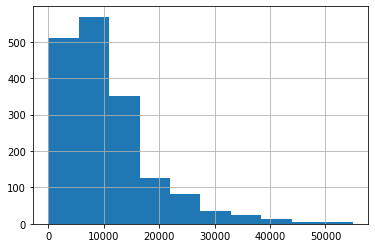

In [10]:
# ヒストグラムを書く
train["y"].hist()

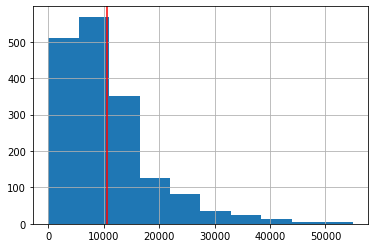

In [11]:
# ヒストグラムで平均値を表す。
# 平均値はaxvlineで引く（色は赤色とする）。
plt.axvline(x=train["y"].mean(),color="red")
train["y"].hist()

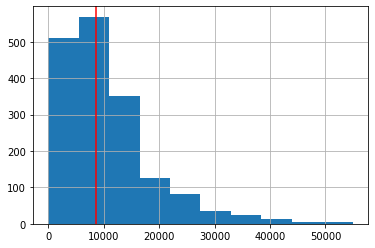

In [12]:
# ヒストグラムで中央値を表す。
# 平均値はaxvlineで引く（色は赤色とする）。
plt.axvline(x=train["y"].median(),color="red")
train["y"].hist()

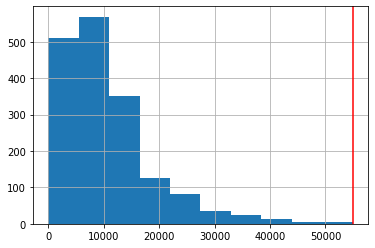

In [13]:
# ヒストグラムで最大値を表すして、平均値はaxvlineで引く（色は赤色とする）
plt.axvline(x=train["y"].max(),color="red")
train["y"].hist()

In [14]:
# 欠損値を確認
train.isnull().any()

id         False
y          False
year       False
stage      False
match      False
gameday    False
time       False
home       False
away       False
stadium    False
tv         False
dtype: bool

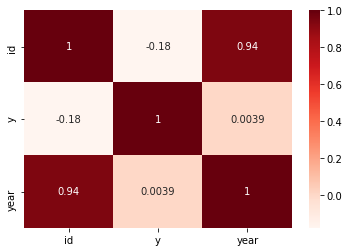

In [15]:
# seabornはデータの可視化(グラフ作成)を行うPythonライブラリ
import seaborn as sns
train_corr = train.corr()
#ヒートマップを表示
# annotは数字を入れるかどうか。cmapは色合い。
sns.heatmap(train_corr, annot=True,cmap='Reds')

In [16]:
# 目的変数はy（観客動員数）
# 説明変数について、観客動員数はtrainのstage（J１か、J2か）、またはhomeがどこのチームか、スタジアムが大きな影響を与えていると仮説を立てる。
# ただ、stage、home,awayに質的変数のため、ダミー変数化する。
train_dummie = pd.get_dummies(train[["stage","home","away"]])
y =  train['y']
print(train_dummie)
print(y)

      stage_Ｊ１  stage_Ｊ２  home_アビスパ福岡  home_アルビレックス新潟  home_カターレ富山  \
0            1         0            0               0            0   
1            1         0            0               0            0   
2            1         0            0               0            0   
3            1         0            0               0            0   
4            1         0            0               0            0   
...        ...       ...          ...             ...          ...   
1716         0         1            0               0            1   
1717         0         1            0               0            0   
1718         0         1            0               0            0   
1719         0         1            1               0            0   
1720         0         1            0               0            0   

      home_カマタマーレ讃岐  home_ガイナーレ鳥取  home_ガンバ大阪  home_ギラヴァンツ北九州  home_コンサドーレ札幌  \
0                 0             0           0               0              0   

In [17]:
train_dummie.head()

,stage_Ｊ１,stage_Ｊ２,home_アビスパ福岡,home_アルビレックス新潟,home_カターレ富山,home_カマタマーレ讃岐,home_ガイナーレ鳥取,home_ガンバ大阪,home_ギラヴァンツ北九州,home_コンサドーレ札幌,...,away_横浜ＦＣ,away_水戸ホーリーホック,away_浦和レッズ,away_清水エスパルス,away_湘南ベルマーレ,away_鹿島アントラーズ,away_ＦＣ岐阜,away_ＦＣ東京,away_ＦＣ町田ゼルビア,away_Ｖ・ファーレン長崎
0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
1,1,0,0,0,0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0
2,1,0,0,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
3,1,0,0,0,0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0
4,1,0,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0


In [18]:
model = LinearRegression()
model.fit(train_dummie,y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [19]:
test_dummie =pd.get_dummies(test[["stage","home","away"]])

In [20]:
test_dummie.head()

,stage_Ｊ１,stage_Ｊ２,home_アビスパ福岡,home_アルビレックス新潟,home_カターレ富山,home_カマタマーレ讃岐,home_ガンバ大阪,home_ギラヴァンツ北九州,home_コンサドーレ札幌,home_サガン鳥栖,...,away_横浜Ｆ・マリノス,away_横浜ＦＣ,away_水戸ホーリーホック,away_浦和レッズ,away_清水エスパルス,away_湘南ベルマーレ,away_鹿島アントラーズ,away_ＦＣ岐阜,away_ＦＣ東京,away_Ｖ・ファーレン長崎
0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,1,0,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [21]:
test['y'] = model.predict(test_dummie)
print(test['y'])

ValueError: matmul: Input operand 1 has a mismatch in its core dimension 0, with gufunc signature (n?,k),(k,m?)->(n?,m?) (size 88 is different from 82)